# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 


The data is located in the file: '50_Startups.csv'. 

You are expected to create a multiple linear regression, using the new data. 

In this exercise, the dependent variable is 'Profit', while the independent variables are 'R&D Spend', 'Administration', 'Marketing Spend', and 'State'.

#### Regarding the 'State' variable:
There are some options: 'New York', 'California', and 'Florida'. You are expected to create a dummy variable for State and include it in the regression.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Declare the dependent and independent variables

In [3]:
x = df[['R&D Spend','Administration','Marketing Spend']]
y = df['Profit']
x

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


## Create a dummy variable for 'State'

In [4]:

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Splitting the dataset into the Training set and Test set

In [27]:


# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)


Training set size (X_train): (40, 5)
Test set size (X_test): (10, 5)


## Create the regression

### Training the Multiple Linear Regression model on the Training set

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
regressor = LinearRegression()

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Display coefficients and intercept
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")


Coefficients: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Intercept: 54028.039593645844

Model Evaluation:
Mean Squared Error (MSE): 82010363.04430102
R-squared (R²) Score: 0.8987266414328637


### Predicting the Test set results

In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Creating a DataFrame to compare actual and predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("\nComparison of Actual vs. Predicted:")
print(comparison.head())  # Display the first few rows





Comparison of Actual vs. Predicted:
       Actual      Predicted
13  134307.35  126362.879083
39   81005.76   84608.453836
30   99937.59   99677.494251
45   64926.08   46357.460686
17  125370.37  128750.482885


### Calculate the Mean Squared Error

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")



Mean Squared Error (MSE): 79195300.72807238


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Handle categorical variables (e.g., 'State') by creating dummy variables
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Separating the features (X) and target (y)
X = df.drop('Profit', axis=1)  # Features
y = df['Profit']  # Target

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print("Scaled Features:\n", X_scaled_df.head())


Scaled Features:
    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   2.016411        0.560753         2.153943      -0.685994        1.393261
1   1.955860        1.082807         1.923600      -0.685994       -0.717741
2   1.754364       -0.728257         1.626528       1.457738       -0.717741
3   1.554784       -0.096365         1.422210      -0.685994        1.393261
4   1.504937       -1.079919         1.281528       1.457738       -0.717741


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
ss = StandardScaler()

In [12]:
x_train[['R&D Spend','Administration','Marketing Spend']] = \
ss.fit_transform(x_train[['R&D Spend','Administration','Marketing Spend']])

x_test[['R&D Spend','Administration','Marketing Spend']] = \
ss.transform(x_test[['R&D Spend','Administration','Marketing Spend']])

In [13]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.31e-22
Time:                        13:28:45   Log-Likelihood:                -420.73
No. Observations:                  40   AIC:                             849.5
Df Residuals:                      36   BIC:                             856.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.146e+05   1491.639     76.796      0.000    1.12e+05    1.18e+05
R&D Spend         3.35e+04   2489.274     13.459      0.000    2.85e+04    3.86e+04
Administration   -225.2322   1611.683     -0.140      0.890   -3493.878    3043.413
Marketing Spend  3484.9572   2460.829      1.416      0.165   -1505.836    8475.751
==============================================================================
Omnibus:                       21.307   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.502
Skew:                          -1.333   Prob(JB):                     9.73e-10
Kurtosis:                       7.218   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y_pred = results.predict(x_test)
y_pred

27    114729.007682
35     90569.032313
40     75952.348616
38     70179.811176
2     179539.151879
3     171638.156375
48     49624.941932
29    102253.124756
46     58381.679070
31     98240.747247
dtype: float64

In [15]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

In [16]:
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mse =  mean_squared_error(y_test,y_pred)
mse

79195300.72807238

In [19]:
df[['R&D Spend', 'Profit']].corr()

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


In [20]:
from scipy import stats

In [21]:
per_coef, p_value = stats.pearsonr(df['R&D Spend'], df['Profit'])

print(per_coef)
print(p_value)

0.9729004656594832
3.500322243690601e-32


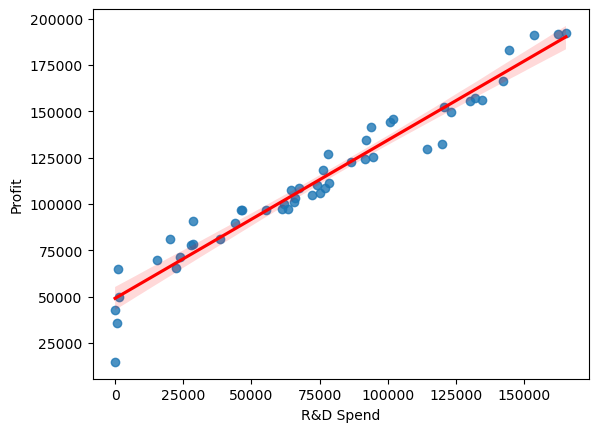

In [22]:
sns.regplot(x="R&D Spend",y='Profit', data=df, line_kws={'color':'red'})
plt.show()